In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/rostya/projects/python/github/ai/Machine-Learning-Data-Science/UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V7/08-Linear-Regression-Models/Advertising.csv')

In [4]:
df.head()  # TV, radio, newspaper - признаки. sales - целевая переменная

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [15]:
polynomial_converter.fit(X)  # Анализ данных

PolynomialFeatures(include_bias=False)

In [22]:
poly_features = polynomial_converter.transform(X)  # Колличество колонок увеличелось

In [23]:
X.shape

(200, 3)

In [26]:
poly_features.shape

(200, 9)

In [21]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [27]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [29]:
230.1 * 37.8  # TV * Radio

8697.779999999999

In [31]:
37.8 * 69.2  # Radio * Newspaper

2615.7599999999998

In [32]:
230.1 * 69.2  # TV * Newspaper

15922.92

In [33]:
230.1 ** 2

52946.009999999995

In [34]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
test_predictions = model.predict(X_test)

In [45]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
MAE = mean_absolute_error(y_test, test_predictions)

In [49]:
MSE = mean_squared_error(y_test, test_predictions)

In [50]:
RMSE = np.sqrt(MSE)

In [53]:
MAE  # Средняя абсолютная ошибка

0.4896798044803838

In [54]:
RMSE  # Среднеквадратическое отклонение

0.6646431757269274

In [55]:
# MAE: 1.213, RMSE: 1.516

In [56]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [57]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [59]:
X.loc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [60]:
69.2 ** 2

4788.64

In [62]:
# 1 Создать различные степени полинома
# 2 Разбить данные на обучающий и тестовый наборы данных
# 3 Обучить модель
# 4 Сохранить метрики RMSE для обучающего и тестового наборов данных
# 5 Нарисовать график с результататами - ошибка по степеням полинома

In [93]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):  # Количество обучаемых степеней
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [94]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292232,
 0.43393443569020673,
 0.35170836883993495,
 0.2509342964085938,
 0.19416302767081609,
 5.421506740110824,
 0.14639313796465378,
 0.16669349723499763]

In [95]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269274,
 0.5803286825236476,
 0.5077742639859423,
 2.5758223594965197,
 4.310389958991024,
 1379.5760739323696,
 3881.913541154056,
 92670.68400656343]

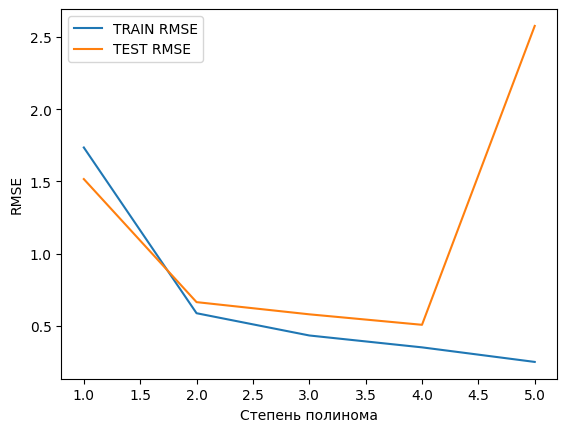

In [99]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='TEST RMSE')

plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()

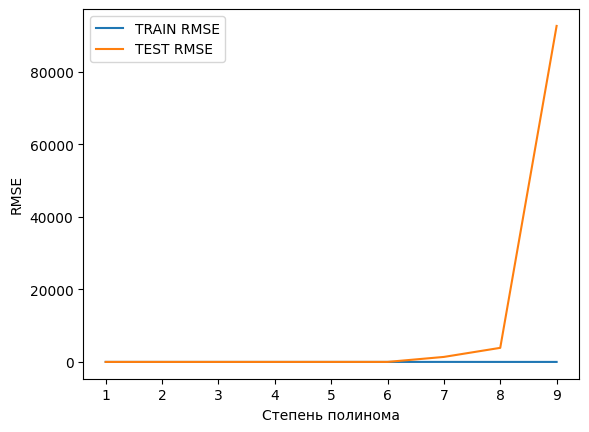

In [100]:
plt.plot(range(1, 10), train_rmse_errors, label='TRAIN RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='TEST RMSE')

plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()

In [101]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [102]:
final_model = LinearRegression()

In [103]:
full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X, y)

LinearRegression()

In [105]:
from joblib import dump, load

In [106]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [107]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [108]:
loaded_converter = load('final_converter.joblib')

In [111]:
loaded_model = load('final_poly_model.joblib')

In [112]:
campaign = [[149, 22, 12]]

In [114]:
loaded_converter.fit_transform(campaign)  # Вернет большое количество признаков

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [115]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [116]:
transformed_data = loaded_converter.fit_transform(campaign)

In [117]:
loaded_model.predict(transformed_data)

array([14.64501014])